In [1]:
import numpy as np
from scipy.stats import randint, norm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
samples = 100
β0 = 250
β1 = 7
β2 = 39
x1 = randint(2, 12).rvs(samples)
x2 = norm(25, 5).rvs(samples)
ϵ = norm(0, 3).rvs(samples)
y = (β1 * x2) + ϵ # (β2 * x2) + β0 + ϵ
x = x2

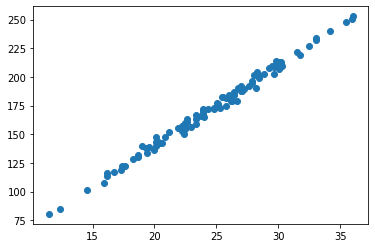

In [3]:
plt.scatter(x, y);

In [4]:
#plt.scatter(x2, y);

In [5]:
# X = np.array([x2]).T
# X[:10]

In [6]:
# np.linalg.inv(X.T@X) @ (X.T@y)

In [7]:
beta = 1

In [8]:
(x*7)[:10]

array([121.83164449, 173.51351267, 157.20055618, 199.17816436,
       190.50858977, 248.16392382, 208.40302836, 176.93911643,
       160.62945012, 207.81350627])

In [9]:
y[:10]

array([122.59299292, 172.64891516, 159.59031587, 199.23033275,
       189.15648709, 247.88405903, 209.88971293, 172.92239453,
       156.66225444, 208.65754679])

In [10]:
def predict(xs, beta):
    return beta * xs

def loss(ys, yhat):
    # squared error
    return (ys - yhat) ** 2

def slope(ys, yhat, xs):
    return -2 * xs * (ys - yhat)

In [11]:
pred1 = predict(x, 1)
print(loss(y, pred1).mean())
pred2 = predict(x, 7)
print(loss(y, pred2).mean())

22692.64513523464
8.807439990172897


In [12]:
betas = list(range(1, 15))
losses = [loss(y, predict(x, b)) for b in betas]

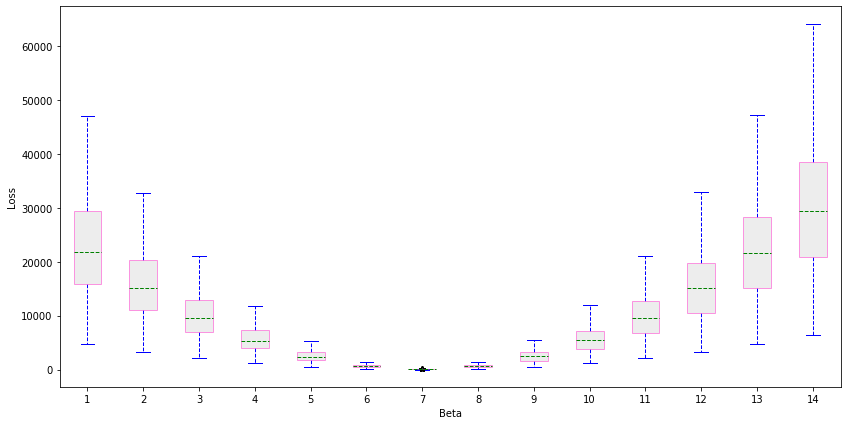

In [13]:
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot(losses, patch_artist=True)
for box in bp['boxes']:
    box.set(color='#ff33cc', linewidth=1)
    box.set(facecolor='#dddddd', alpha=0.5)
for whisker in bp['whiskers']:
    whisker.set(color='blue', linewidth=1, linestyle='--')
for cap in bp['caps']:
    cap.set(color='blue', linewidth=1)
for median in bp['medians']:
    median.set(color='green', linewidth=1, linestyle='--')
for flier in bp['fliers']:
    flier.set(color='black', marker='*', alpha=0.7)
ax.set_xticklabels(betas)
ax.set_xlabel('Beta')
ax.set_ylabel('Loss')
plt.show()

In [14]:
derivitives = [slope(y, predict(x, b), x) for b in betas]

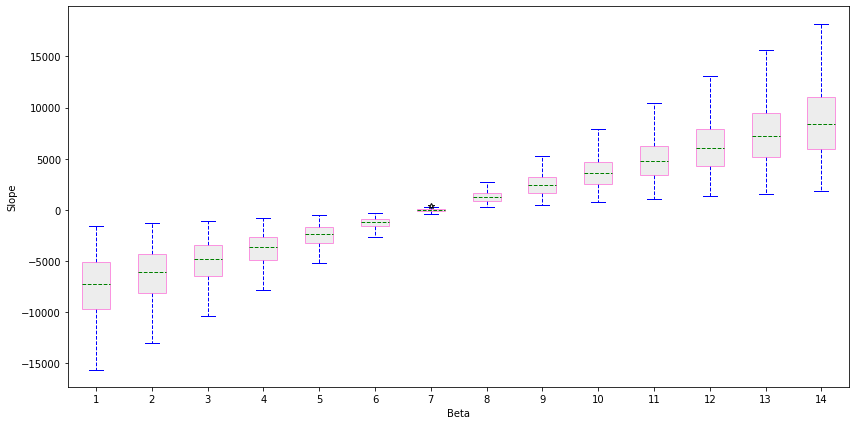

In [15]:
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot(derivitives, patch_artist=True)
for box in bp['boxes']:
    box.set(color='#ff33cc', linewidth=1)
    box.set(facecolor='#dddddd', alpha=0.5)
for whisker in bp['whiskers']:
    whisker.set(color='blue', linewidth=1, linestyle='--')
for cap in bp['caps']:
    cap.set(color='blue', linewidth=1)
for median in bp['medians']:
    median.set(color='green', linewidth=1, linestyle='--')
for flier in bp['fliers']:
    flier.set(color='black', marker='*', alpha=0.7)
ax.set_xticklabels(betas)
ax.set_xlabel('Beta')
ax.set_ylabel('Slope')
plt.show()

In [16]:
# gradient descent

In [17]:
beta = -9999
α = 0.0001 # learning rate, rate of descent
mses = []

In [18]:
for i in range(100):
    predictions = predict(x, beta)
    mse = loss(y, predictions).mean()
    mean_slope = slope(y, predictions, x).mean()
    beta -= mean_slope * α
    mses.append(mse)

In [19]:
beta

6.994024946762324

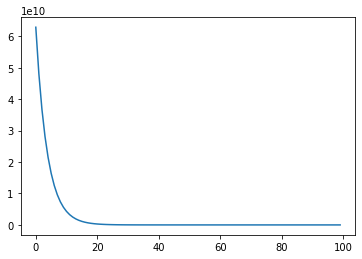

In [20]:
plt.plot(range(100), mses);